# <center>Multivariate Linear Regression on House Pricing Data</center>


### <center>Source: Kaggle - House Prices: Advanced Regression Techniques
<center> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from numpy.polynomial.polynomial import polyfit
from pandas import Series
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima_model import ARMA
from statsmodels.compat import lzip

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression


%load_ext autoreload
%autoreload 2

## Data Engineering

In [3]:
traindf = pd.read_csv('train.csv')

In [4]:
drop_list = ['Exterior2nd', 'YearRemodAdd', 'LotShape', 'MSSubClass', 'TotalBsmtSF', 'Alley', 'GarageYrBlt', 'PoolQC', 'MiscFeature', 'MiscFeature']

#### Moving Sale Price over to targetdf

In [5]:
targetdf = traindf[['Id', 'SalePrice']]
traindf.drop('SalePrice', axis=1, inplace=True)

#### Removing problematic columns

In [6]:
traindf = traindf.drop(drop_list, axis=1)

#### Seperating the catagorical and numerical data

In [7]:
traindf_cat = traindf[['Id', 'MSZoning']].copy()
traindf.drop('MSZoning', axis=1, inplace=True)

In [8]:
lotfront = traindf.LotFrontage.mean()

Replacing NA values with the mean value for the column

In [9]:
traindf.LotFrontage.fillna(value=lotfront, inplace=True)

In [10]:
traindf_cat.FireplaceQu = traindf.FireplaceQu
traindf_cat.FireplaceQu.fillna(value='None', inplace=True)
traindf.drop('FireplaceQu', axis = 1, inplace=True)

In [11]:
traindf_cat['Street'] = traindf.Street
traindf.drop('Street', axis=1, inplace=True)

In [12]:
traindf_cat['LandContour'] = traindf.LandContour
traindf.drop('LandContour', axis=1, inplace=True)

In [13]:
traindf_cat['Utilities'] = traindf.Utilities
traindf.drop('Utilities', axis=1, inplace=True)

In [14]:
traindf_cat['LotConfig'] = traindf.LotConfig
traindf.drop('LotConfig', axis=1, inplace=True)

In [15]:
traindf_cat['LandSlope'] = traindf.LandSlope
traindf.drop('LandSlope', axis=1, inplace=True)

In [16]:
traindf_cat['Neighborhood'] = traindf.Neighborhood
traindf.drop('Neighborhood', axis=1, inplace=True)

In [17]:
traindf_cat['Condition1'] = traindf.Condition1
traindf.drop('Condition1', axis=1, inplace=True)

traindf_cat['Condition2'] = traindf.Condition2
traindf.drop('Condition2', axis=1, inplace=True)

In [18]:
traindf_cat['BldgType'] = traindf.BldgType
traindf.drop('BldgType', axis=1, inplace=True)

In [19]:
traindf_cat['HouseStyle'] = traindf.HouseStyle
traindf.drop('HouseStyle', axis=1, inplace=True)

In [20]:
traindf_cat['RoofStyle'] = traindf.RoofStyle
traindf.drop('RoofStyle', axis=1, inplace=True)

In [21]:
traindf_cat['RoofMatl'] = traindf.RoofMatl
traindf.drop('RoofMatl', axis=1, inplace=True)

In [22]:
traindf_cat['Exterior1st'] = traindf.Exterior1st
traindf.drop('Exterior1st', axis=1, inplace=True)

#traindf_cat['Exterior2nd'] = traindf.Exterior2nd
#traindf.drop('Exterior2nd', axis=1, inplace=True)

In [23]:
traindf.MasVnrType.fillna(value='None', inplace=True)
traindf_cat['MasVnrType'] = traindf.MasVnrType
traindf.drop('MasVnrType', axis=1, inplace=True)

In [24]:
traindf_cat.ExterQual = traindf.ExterQual
traindf.drop('ExterQual', axis=1, inplace=True)

In [25]:
traindf_cat.ExterCond = traindf.ExterCond 
traindf.drop('ExterCond', axis=1, inplace=True)

In [26]:
traindf_cat['Foundation'] = traindf.Foundation
traindf.drop('Foundation', axis=1, inplace=True)

In [27]:
traindf.MasVnrArea.fillna(value=0.00, inplace=True) 

In [28]:
traindf_cat.BsmtCond = traindf.BsmtCond
traindf.drop('BsmtCond', axis=1, inplace=True)

In [29]:
traindf_cat.BsmtFinType1 = traindf.BsmtFinType1
traindf.drop('BsmtFinType1', axis=1, inplace=True)

In [30]:
traindf_cat.BsmtExposure = traindf.BsmtExposure
traindf.drop('BsmtExposure', axis=1, inplace=True)

In [31]:
traindf_cat.BsmtQual = traindf.BsmtQual
traindf.drop('BsmtQual',axis=1, inplace=True)

In [32]:
traindf_cat.BsmtFinType2 = traindf.BsmtFinType2
traindf.drop('BsmtFinType2', axis=1, inplace=True)

In [33]:
traindf_cat['Heating'] = traindf.Heating
traindf.drop('Heating', axis=1, inplace=True)

In [34]:
traindf.HeatingQC = traindf.HeatingQC
traindf.drop('HeatingQC', axis=1, inplace=True)

In [35]:
traindf_cat['CentralAir'] = traindf.CentralAir
traindf.drop('CentralAir', axis=1, inplace=True)

In [36]:
traindf_cat['Electrical'] = traindf.Electrical
traindf.drop('Electrical', axis=1, inplace=True)
traindf_cat.Electrical.fillna(value='None', inplace=True)

In [37]:
traindf_cat.KitchenQual = traindf.KitchenQual
traindf.drop('KitchenQual', axis=1, inplace=True)

In [38]:
traindf_cat['Functional'] = traindf.Functional
traindf.drop('Functional', axis=1, inplace=True)

In [39]:
traindf_cat['GarageType'] = traindf.GarageType
traindf.drop('GarageType', axis=1, inplace=True)
traindf_cat.GarageType.fillna(value='NoGarage', inplace=True)

In [40]:
traindf_cat.GarageFinish = traindf.GarageFinish
traindf.drop('GarageFinish', axis=1, inplace=True)

In [41]:
traindf_cat.GarageQual = traindf.GarageQual
traindf.drop('GarageQual', axis=1, inplace=True)

In [42]:
traindf_cat.GarageCond = traindf.GarageCond
traindf.drop('GarageCond',axis=1, inplace=True)

In [43]:
traindf_cat['PavedDrive'] = traindf.PavedDrive
traindf.drop('PavedDrive', axis=1, inplace=True)

In [44]:
traindf_cat['Fence'] = traindf.Fence
traindf.drop('Fence', axis=1, inplace=True)
traindf_cat.fillna(value='NoFence', inplace=True)

In [45]:
traindf_cat['MoSold'] = traindf.MoSold
traindf.drop('MoSold', axis=1, inplace=True)

In [46]:
traindf_cat['SaleType'] = traindf.SaleType
traindf.drop('SaleType', axis=1, inplace=True)

In [47]:
traindf_cat['SaleCondition'] = traindf.SaleCondition
traindf.drop('SaleCondition', axis=1, inplace=True)

In [48]:
traindf_cat['BsmtFullBath'] = traindf.BsmtFullBath
traindf.drop('BsmtFullBath', axis=1, inplace=True)

In [49]:
traindf_cat['BsmtHalfBath'] = traindf.BsmtHalfBath
traindf.drop('BsmtHalfBath', axis=1, inplace=True)

In [50]:
traindf_cat['FullBath'] = traindf.FullBath
traindf.drop('FullBath', axis=1, inplace=True)

In [51]:
traindf_cat['HalfBath'] = traindf.HalfBath
traindf.drop('HalfBath', axis=1, inplace=True)

In [52]:
traindf_cat['BedroomAbvGr'] = traindf.BedroomAbvGr
traindf.drop('BedroomAbvGr', axis=1, inplace=True)

In [53]:
traindf_cat['KitchenAbvGr'] = traindf.KitchenAbvGr
traindf.drop('KitchenAbvGr', axis=1, inplace=True)

In [54]:
traindf_cat['TotRmsAbvGrd'] = traindf.TotRmsAbvGrd
traindf.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [55]:
traindf_cat['Fireplaces'] = traindf.Fireplaces
traindf.drop('Fireplaces', axis=1, inplace=True)

In [56]:
traindf_cat['GarageCars'] = traindf.GarageCars
traindf.drop('GarageCars', axis=1, inplace=True)

In [57]:
traindf['ThreeSsnPorch'] = traindf['3SsnPorch']
traindf.drop('3SsnPorch', axis=1, inplace=True)

In [58]:
traindf['FirstFlrSF'] = traindf['1stFlrSF']
traindf.drop('1stFlrSF', axis=1, inplace=True)

In [59]:
traindf['SecondFlrSF'] = traindf['2ndFlrSF']
traindf.drop('2ndFlrSF', axis=1, inplace=True)

## Feature Scaling - Apply Box-Cox?
### Box-Cox did not improve the model

In [60]:
traindf_cat.shape

(1460, 36)

In [61]:
traindf_columns = traindf.columns

In [62]:
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,15.060959,2.758904,43.489041,2007.815753,3.409589,1162.626712,346.992466
std,421.610009,22.024023,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,55.757415,40.177307,496.123024,1.328095,29.317331,386.587738,436.528436
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,334.000000,0.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000,882.000000,0.000000
50%,730.500000,70.049958,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,1087.000000,0.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,1391.250000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,508.000000,4692.000000,2065.000000


In [63]:
import scipy.stats
low_vals = []
box = ['LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'ThreeSsnPorch', 'FirstFlrSF', 'SecondFlrSF']
box1 = 'OverallCond'
for ox in box:
    #print(f"traindf['{ox}'] = stats.boxcox(traindf['{ox}'])[0]")
    print(traindf[f'{ox}'].min(), ox)

1300 LotArea
1 OverallCond
1872 YearBuilt
0.0 MasVnrArea
0 BsmtFinSF1
0 BsmtFinSF2
0 BsmtUnfSF
0 WoodDeckSF
0 OpenPorchSF
0 EnclosedPorch
0 ScreenPorch
0 PoolArea
0 MiscVal
2006 YrSold
0 ThreeSsnPorch
334 FirstFlrSF
0 SecondFlrSF


In [64]:
#traindf['LotArea'] = stats.boxcox(traindf['LotArea'])[0]
#traindf['YearBuilt'] = stats.boxcox(traindf['YearBuilt'])[0]
#traindf['OverallCond'] = stats.boxcox(traindf['OverallCond'])[0]
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
#traindf['BsmtFinSF1'] = stats.boxcox(traindf['BsmtFinSF1'])[0]
#traindf['BsmtFinSF2'] = stats.boxcox(traindf['BsmtFinSF2'])[0]
#traindf['BsmtUnfSF'] = stats.boxcox(traindf['BsmtUnfSF'])[0]
#traindf['WoodDeckSF'] = stats.boxcox(traindf['WoodDeckSF'])[0]
#traindf['OpenPorchSF'] = stats.boxcox(traindf['OpenPorchSF'])[0]
#traindf['EnclosedPorch'] = stats.boxcox(traindf['EnclosedPorch'])[0]
#traindf['ScreenPorch'] = stats.boxcox(traindf['ScreenPorch'])[0]
#traindf['PoolArea'] = stats.boxcox(traindf['PoolArea'])[0]
#traindf['MiscVal'] = stats.boxcox(traindf['MiscVal'])[0]
#traindf['YrSold'] = stats.boxcox(traindf['YrSold'])[0]
#traindf['ThreeSsnPorch'] =x stats.boxcox(traindf['ThreeSsnPorch'])[0]
#traindf['FirstFlrSF'] = stats.boxcox(traindf['FirstFlrSF'])[0]
#traindf['SecondFlrSF'] = stats.boxcox(traindf['SecondFlrSF'])[0]

In [65]:
#x = traindf['MasVnrArea'].replace(0, 'nan')
#l = stats.boxcox(x.dropna())[1]


In [66]:
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.117123,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,15.060959,2.758904,43.489041,2007.815753,3.409589,1162.626712,346.992466
std,421.610009,22.024023,9981.264932,1.382997,1.112799,30.202904,180.731373,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,55.757415,40.177307,496.123024,1.328095,29.317331,386.587738,436.528436
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,334.000000,0.000000
25%,365.750000,60.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000,882.000000,0.000000
50%,730.500000,70.049958,9478.500000,6.000000,5.000000,1973.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,1087.000000,0.000000
75%,1095.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,1391.250000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,508.000000,4692.000000,2065.000000


In [67]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

ss = StandardScaler()

traindfss = pd.DataFrame(ss.fit_transform(traindf))
traindfss.set_index(traindf.Id, inplace=True)
traindfss.columns = traindf_columns 
# Remove outliers, i.e. data points outside of 2 standard deviations of the mean
traindfss = traindfss[(np.abs(stats.zscore(traindfss)) < 2).all(axis=1)]
#X_train_numeric.head()

In [68]:
traindfss.drop('Id', axis=1, inplace=True)

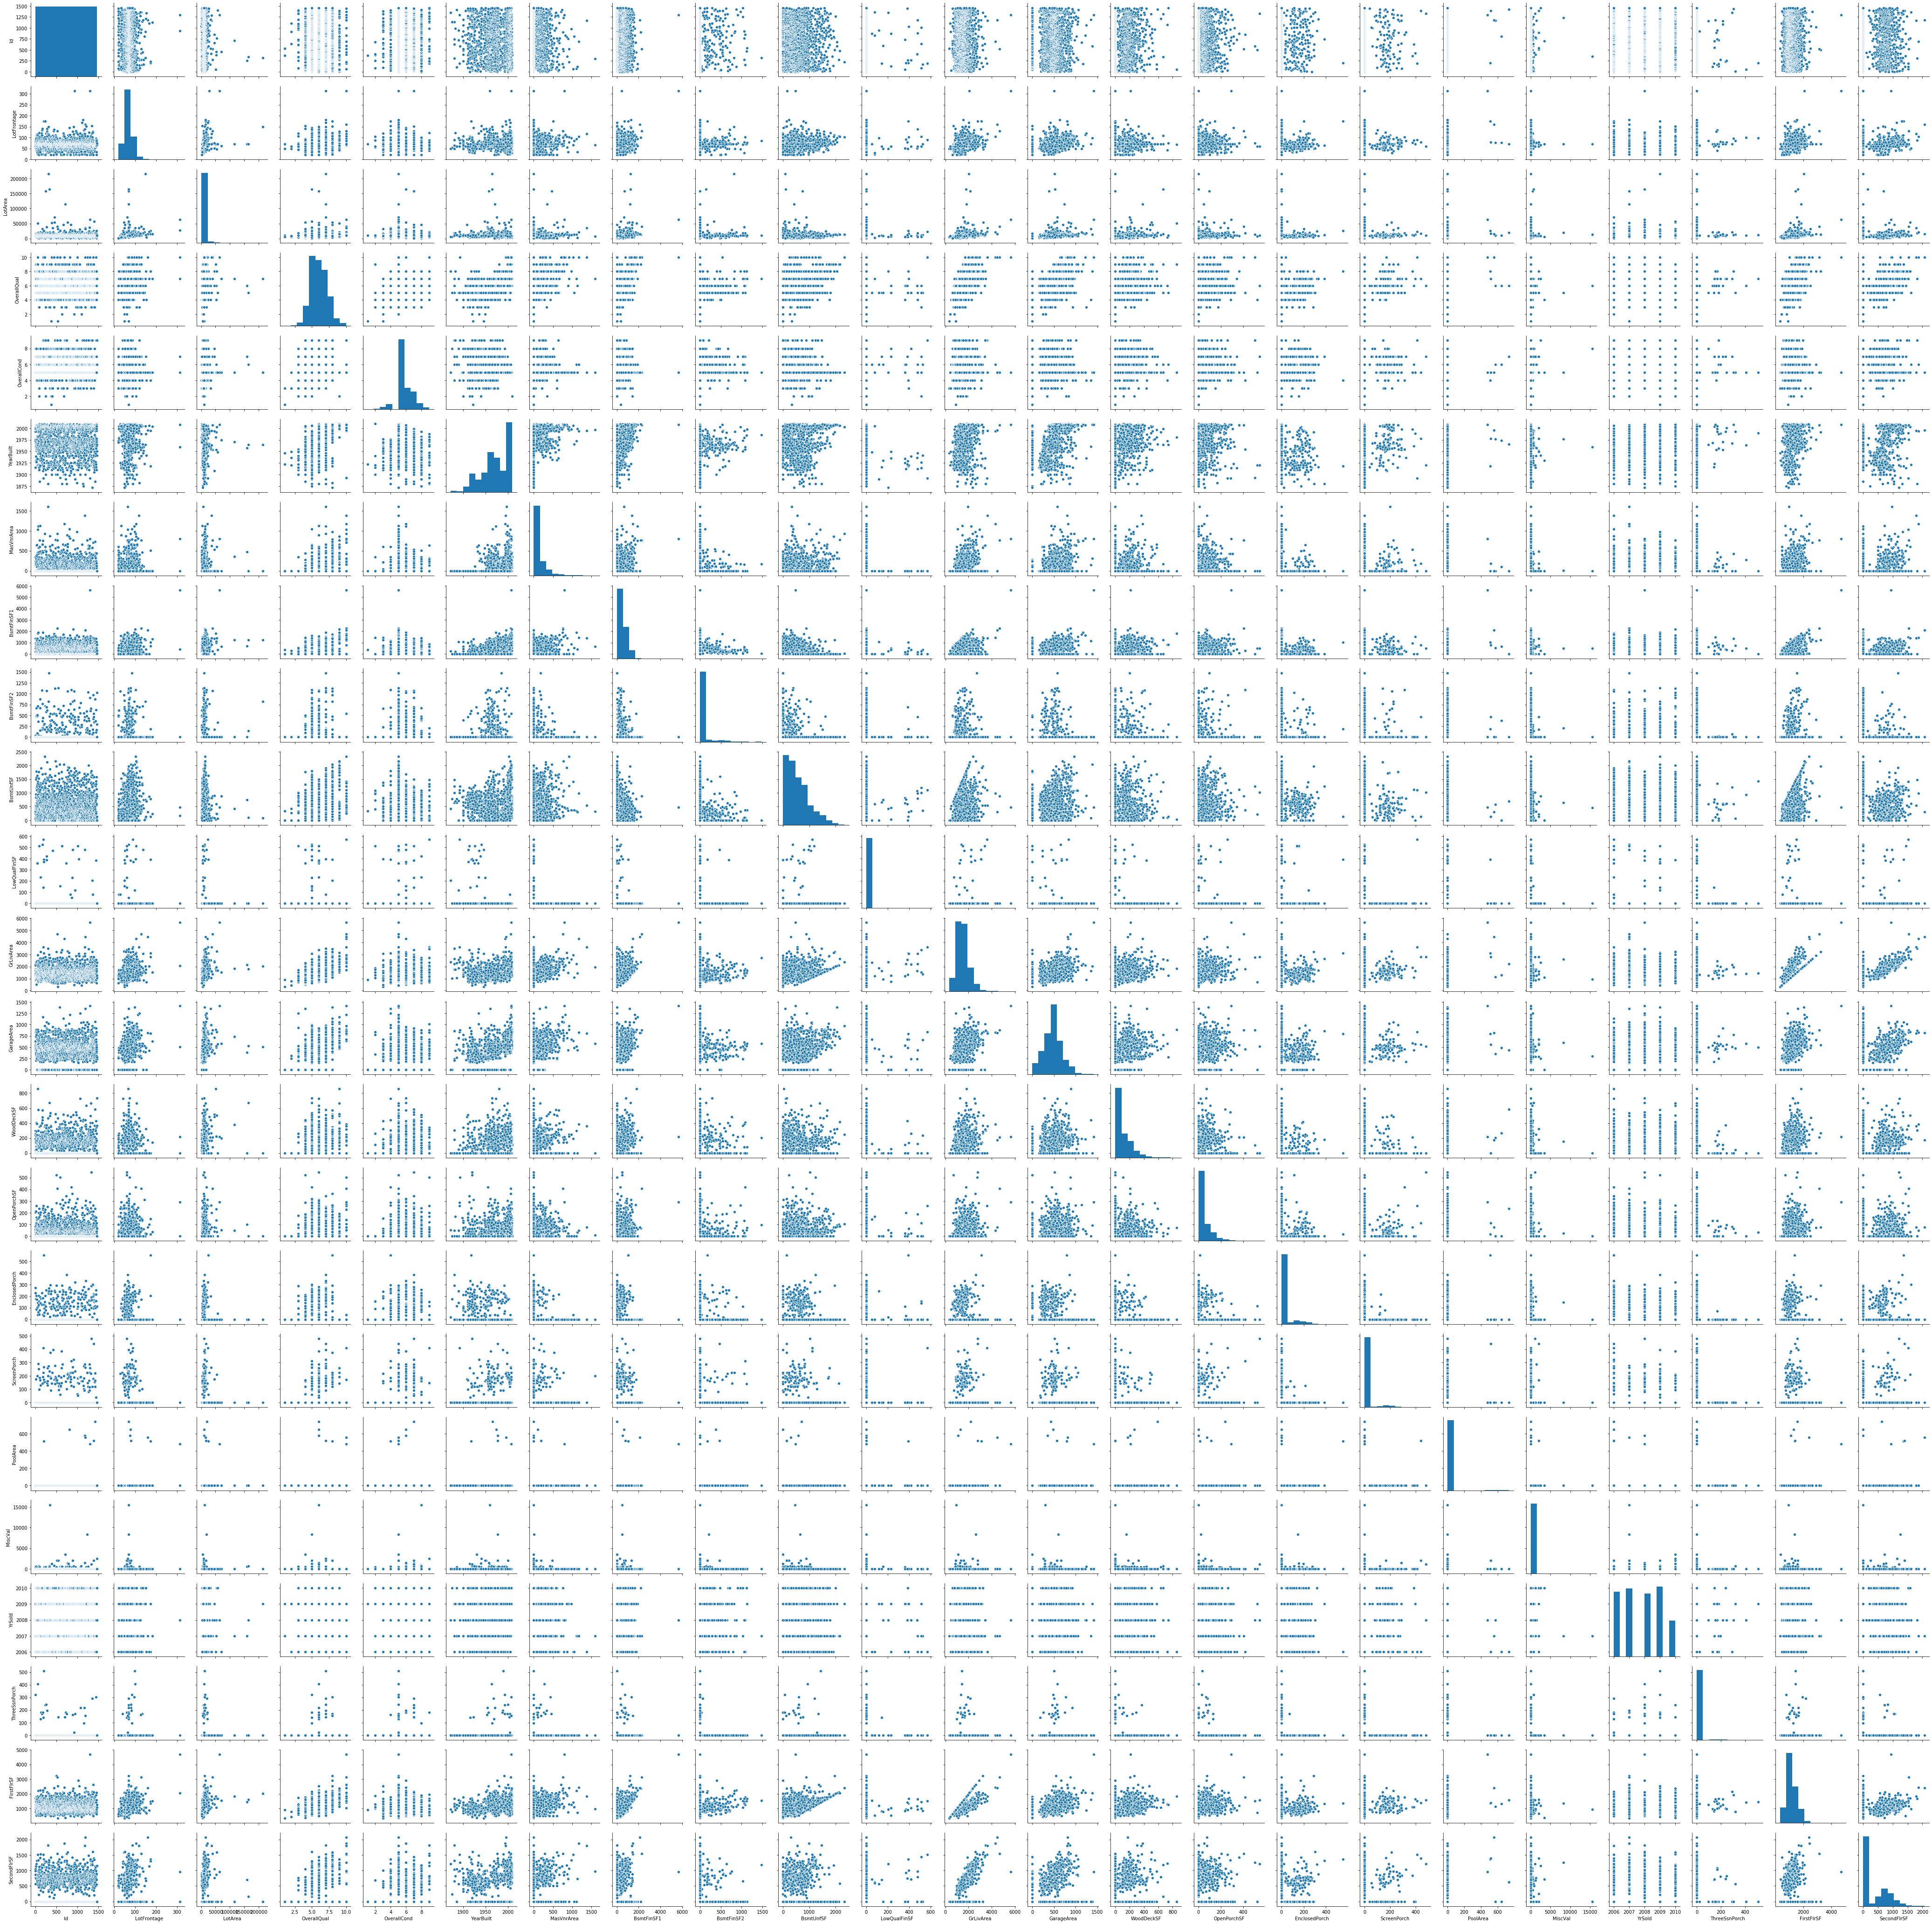

In [69]:
sns.pairplot(traindf)

## Getting dummies

In [70]:
traindf_cat.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [71]:
traindf_cat.HouseStyle= traindf_cat.HouseStyle.replace({'1.5Fin': '1.5_Fin', '1.5Unf': '1_5Unf', '2.5Unf':'2_5Unf', '2.5Fin':'2_5Fin'}, value=None)

In [72]:
traindf_cat.Exterior1st= traindf_cat.Exterior1st.replace({'Wd Sdng': 'Wd_Sdng'}, value=None)

In [73]:
traindf_cat.RoofMatl= traindf_cat.RoofMatl.replace({'Tar&Grv': 'TarGrv'}, value=None)

In [74]:
cat_list = list(traindf_cat.columns)[1:]

In [75]:
traindf_cat_bined= pd.get_dummies(traindf_cat, columns=cat_list, drop_first=True)
traindf_cat_bined

,Id,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4
0,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,3,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,4,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,5,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1456,1457,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1457,1458,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1458,1459,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [76]:
columnfixlist = [traindf_cat_bined.columns[i] for i in range(len(traindf_cat_bined.columns))]
#columnfixlist

In [115]:
train_combined = pd.merge(traindf_cat_bined, traindfss, on='Id', left_index=True, right_index=True)

(684, 213)

In [78]:
targetdf = targetdf.loc[train_combined.index]

In [79]:
train_combined.drop('Id', axis=1, inplace=True)

In [80]:
targetdf.set_index('Id', inplace=True)

In [81]:
targetdf.head()

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000


## Testing for colinearity amonst columns

### Testing for intercorrelation

In [82]:
def test_colinear(train_combined):
    col_names = list(train_combined.columns)
    
    colinear = []
    for ax1 in col_names:
        for ax2 in col_names:
            if ax1 == ax2:
                break
            else:
                if train_combined[f'{ax1}'].corr(train_combined[f'{ax2}']) >= .75:
                    colinear.append((ax1,ax2))
    return colinear

### Testing for correlation with Target - SalePrice

In [83]:
col_names = list(train_combined)
corr_saleprice = {}
for i in col_names:
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])

In [84]:
corr_table = pd.DataFrame(corr_saleprice.values(), index = corr_saleprice.keys())

### Optimizing the degree of variables

In [85]:
#for y in col_names:
 #   plt.hist(train_combined[y])
  #  plt.ylabel('# of occurances')
   # plt.xlabel(f'{y}')

### Testing the linear regression ---- Too many features ---- Use Lasso or Elastic Net


In [86]:
#lr = LinearRegression()
#lr.fit(traindfss, targetdf1ss)
#y_hat_train = lr.predict(traindfss)
#print(lr.coef_, traindfss.columns)
#print(traindfss.columns)

In [87]:
#from sklearn.metrics import r2_score, mean_squared_error 

#print(f"intercept: {lr.intercept_}")
#print(f"r^2: {r2_score(targetdf, y_hat_train)}")
#print(f"rmse: {np.sqrt(mean_squared_error(targetdf, y_hat_train))}")

In [88]:
### NEED to Use 

### Previous R^2 values ###


### Added Rooms, Car garage, fireplaces and some other discrete values to the catagorical side of the table... increased features
### by approx 30 --- need to check R^2 adj 
# r^2: 0.898540213574302
# rmse: 25772.696681156067

### Replaced lot frontage with mean value instead of '0'
# r^2: 0.8175929129184736
# rmse: 34972.641412123485


### Initial R^2 to beat
# r^2: 0.6589675323
# rmse: 36779.91592177666

In [89]:
import statsmodels.formula.api as sm
import statsmodels.tools as smtools
#train_combined_string = ''
#for i in [train_combined.columns[i] for i in range(len(train_combined.columns))]:
 #   train_combined_string += i + ' + ' 
#train_combined_string = train_combined_string[0:-3]


#train_combined_withc = smtools.add_constant(train_combined)
#sm_formula = ("SalePrice ~ " + train_combined_string ) 
#ols_data = pd.merge(targetdf, train_combined_withc, left_index=True, right_index=True)

#results = sm.ols(formula = sm_formula,data = ols_data).fit()

### Lasso Regression

 Maybe try Elastic Net?

In [90]:
test_colinear(train_combined)

[('Neighborhood_Somerst', 'MSZoning_FV'),
 ('SaleCondition_Partial', 'SaleType_New'),
 ('TotRmsAbvGrd_14', 'BedroomAbvGr_8'),
 ('SecondFlrSF', 'GrLivArea')]

In [91]:
corr_saleprice = {}
for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
corr_saleprice

{'Neighborhood_Somerst': -0.014909971009699461,
 'MSZoning_FV': -0.005347045761531185,
 'SaleCondition_Partial': -0.022802602878438476,
 'SaleType_New': -0.014845104395470118,
 'TotRmsAbvGrd_14': -0.018540146063176235,
 'BedroomAbvGr_8': -0.018540146063176235,
 'SecondFlrSF': -0.02513005217815935,
 'GrLivArea': -0.029023473979272383}

In [92]:
train_combined.drop(['MSZoning_FV', 'SaleType_New', 'BldgType_Duplex', 'BedroomAbvGr_8', 'SecondFlrSF'], axis=1, inplace=True)

In [93]:
from sklearn.model_selection import train_test_split
X = train_combined
y = targetdf

# Train-test split, then "set aside" test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [94]:
import statsmodels.tools.tools as smtools
train_combined_withc_atest = smtools.add_constant(train_combined)

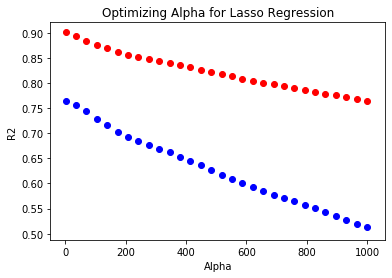

In [121]:
from sklearn.linear_model import Lasso #### try alphas; check adj R^2
a = .05

for a in np.linspace(1, 1000, num=30):
    Lassoreg = Lasso(alpha= a, max_iter = 1000000000, normalize = False)
    Lassoreg.fit(train_combined_withc_atest, targetdf)
    L_target_prediction = Lassoreg.predict(train_combined_withc_atest)
    lassCoef = Lassoreg.coef_
    
    count = 0
    for i in Lassoreg.coef_:
        if abs(i) < .01:
            count += 1
    
    R2 = Lassoreg.score(train_combined_withc_atest, targetdf)
    n = len(train_combined_withc_atest)
    k = len(train_combined_withc_atest.columns) - count
    adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
    
    plt.scatter(x=a, y = adjR2, c='b')
    plt.scatter(x=a, y = R2, c='r')
    plt.xlabel('Alpha')
    plt.ylabel('R2')
    plt.title('Optimizing Alpha for Lasso Regression')
    
    #print(f'Adjusted R2: {adjR2}')

In [96]:
### Final model - Incorperating all the data for the best model

In [112]:
Lassoreg = Lasso(alpha= 1.6, max_iter = 1000000000, normalize = False)
Lassoreg.fit(train_combined_withc_atest, targetdf)
L_target_prediction = Lassoreg.predict(train_combined_withc_atest)
lassCoef = Lassoreg.coef_

count = 0
for i in Lassoreg.coef_:
    if abs(i) < .01:
        count += 1
    
R2 = Lassoreg.score(train_combined_withc_atest, targetdf)
n = len(train_combined_withc_atest)
k = len(train_combined_withc_atest.columns) - count
adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
rmse = (mean_squared_error(targetdf, L_target_prediction))**.5

print(f'rmse: {rmse}')
print(f'saleprice mean: {targetdf.SalePrice.mean()}')
print(f'Adjusted R2: {adjR2}') 
print(f'R2: {Lassoreg.score(train_combined_withc_atest, targetdf)}')

rmse: 24880.119598926307
saleprice mean: 182337.9707602339
Adjusted R2: 0.7650684683165573
R2: 0.9005906272184081


In [98]:
# X_train, X_test, y_train, y_test

In [99]:
Lassoreg = Lasso(alpha= 1.6, max_iter = 1000000000, normalize = False)
Lassoreg.fit(X_train, y_train)
L_target_prediction_train = Lassoreg.predict(X_train)
lassCoef_train = Lassoreg.coef_

count = 0
for i in Lassoreg.coef_:
    if abs(i) < .01:
        count += 1
    
R2_train = Lassoreg.score(X_train, y_train)
n = len(X_train)
k = len(X_train.columns) - count
adjR2_train = R2_train - ((n - 1)/(n - k)) * (1 - R2_train)
rmse_train = (mean_squared_error(y_train, L_target_prediction_train))**.5

print(f'rmse: {rmse_train}')
print(f'saleprice mean: {y_train.SalePrice.mean()}')
print(f'Adjusted R2: {adjR2_train}') 
print(f'R2: {R2_train}')

rmse: 24512.303843437934
saleprice mean: 180114.5831809872
Adjusted R2: 0.7560564359740495
R2: 0.9021015960159015


In [100]:
L_target_prediction_test = Lassoreg.predict(X_test)

count = 0
for i in Lassoreg.coef_:
    if abs(i) < .01:
        count += 1
    
R2_test = Lassoreg.score(X_test, y_test)
n = len(X_test)
k = len(X_test.columns) - count
adjR2_test = R2_test - ((n - 1)/(n - k)) * (1 - R2_test)
rmse_test = (mean_squared_error(y_test, L_target_prediction_test))**.5

print(f'rmse: {rmse_test}')
print(f'saleprice mean: {y_test.SalePrice.mean()}')
print(f'Adjusted R2: {adjR2_test}') 
print(f'R2: {R2_test}')

rmse: 36172.409541983565
saleprice mean: 191215.2919708029
Adjusted R2: 1.42182931644556
R2: 0.7982555443086452


In [119]:
len(coef_col)

182

In [101]:
traindf_cat.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

In [102]:
coef_col =  {}

for i in range(len(Lassoreg.coef_)):
    coef_col[Lassoreg.coef_[i]] =  train_combined.columns[i] 
for key in sorted(coef_col.keys()):
    print(f'{key}, {coef_col[key]}')

-196321.43267365012, Condition2_PosN
-151023.66065282314, BedroomAbvGr_6
-116708.50492018864, BedroomAbvGr_5
-98828.16050399427, BedroomAbvGr_4
-97074.67653881041, BedroomAbvGr_3
-85741.41037936375, BedroomAbvGr_2
-73705.97813904926, Functional_Maj2
-55698.60770386128, BedroomAbvGr_1
-49971.71416245879, Condition2_Feedr
-48200.3712259912, BldgType_Twnhs
-40547.004022579495, SaleCondition_Alloca
-36563.43702426221, Foundation_Wood
-35114.491229819054, BldgType_TwnhsE
-34805.3080915668, GarageCars_1
-30610.935405778935, LandSlope_Sev
-30595.787657921454, Neighborhood_Edwards
-30479.411863830122, SaleType_ConLw
-30375.13199604336, KitchenAbvGr_3
-30355.059702145452, Neighborhood_SWISU
-28822.397766377897, Neighborhood_NWAmes
-28218.05720808536, Neighborhood_OldTown
-28099.676182804295, HouseStyle_2_5Fin
-27236.160642711104, GarageCars_2
-27235.95366070599, RoofMatl_TarGrv
-26936.642899676666, SaleType_CWD
-26696.795622028207, Condition2_RRNn
-26315.008330695695, RoofStyle_Mansard
-25176.4

In [116]:
len(coef_col)

182

## Confirming Assumptions are upheld

### No Collinearity between features

In [103]:
test_colinear(train_combined)

[]

In [104]:
corr_saleprice = {}
for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
corr_saleprice

{}

### Normal distribution of residual: Q-Q plot

In [105]:
residuals = L_target_prediction - targetdf.SalePrice

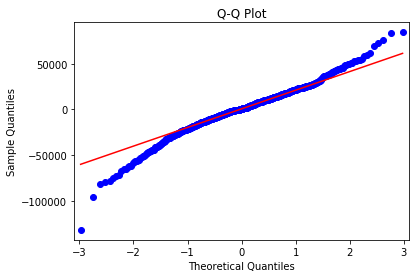

In [106]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='q');
plt.title('Q-Q Plot');

### Homoscedasticity:

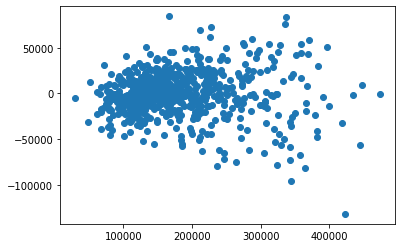

In [107]:
plt.scatter(x = L_target_prediction, y = residuals);

### No AutoCorrelation

#### Durbin-Watson Test

In [108]:
import statsmodels.stats.stattools as stools
stools.durbin_watson(residuals)


2.110661717850092

Value is extremely close to 2, by definition a value of 2 means there is no auto correlation.